### Import required libraries

In [1]:
import numpy as np, pandas as pd, matplotlib.pyplot  as plt, seaborn as sns
import datetime
from  matplotlib.ticker import FuncFormatter
%matplotlib inline 

### 0. Load dataset to dataframe

In [2]:
loan = pd.read_csv('loan.csv')

C:\Users\kcnl843\AppData\Local\Temp\ipykernel_19624\1890675884.py:1: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  loan = pd.read_csv('loan.csv')


In [3]:
print(loan.shape)
print()
print(loan.info())
# Extract Column list before dropping fields
col_list_0_init = loan.columns.tolist()
print(col_list_0_init)

(39717, 111)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB
None
['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med', 'mths_since_l

##  Data Cleansing (Elimination)
### 1. Remove insignificant Columns with NA (NaN) values

In [4]:
loan.dropna(axis=1, how='all', inplace=True)

In [5]:
print(loan.shape)
print()
print(loan.info())

(39717, 57)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 57 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc        

In [6]:
# Extract Column list after dropping NA fields
col_list_remove_NA = loan.columns.tolist()
print(col_list_remove_NA)

['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med', 'policy_code', 'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt', 'pub_rec_bankruptcies', 'tax_liens']


## We observer that by chopping NA columns from the dataFrame has reduced the size of dateset by 50% 
## ~34 MB to ~17 MB

### 2a. Analyse Columns like description, free text fields etc (ID, Member ID, URL, Title, Desc,... ) 

In [7]:
print(loan.filter(['id','member_id','url','title','desc','emp_title','zip_code']).head())

        id  member_id                                                url  \
0  1077501    1296599  https://lendingclub.com/browse/loanDetail.acti...   
1  1077430    1314167  https://lendingclub.com/browse/loanDetail.acti...   
2  1077175    1313524  https://lendingclub.com/browse/loanDetail.acti...   
3  1076863    1277178  https://lendingclub.com/browse/loanDetail.acti...   
4  1075358    1311748  https://lendingclub.com/browse/loanDetail.acti...   

                  title                                               desc  \
0              Computer    Borrower added on 12/22/11 > I need to upgra...   
1                  bike    Borrower added on 12/22/11 > I plan to use t...   
2  real estate business                                                NaN   
3              personel    Borrower added on 12/21/11 > to pay for prop...   
4              Personal    Borrower added on 12/21/11 > I plan on combi...   

                  emp_title zip_code  
0                       NaN    860x

### 2b. Remove the Descriptive columns analyzed above as it doesn't provide an indication for defaulters

In [8]:
loan.drop(['id','member_id','url','title','desc','emp_title','zip_code'], inplace=True, axis=1)
print(loan.shape)
print()
# Extract Column list after dropping Desc fields
col_list_2_remove_Desc = loan.columns.tolist()
print(col_list_2_remove_Desc)

(39717, 50)

['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'purpose', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med', 'policy_code', 'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt', 'pub_rec_bankruptcies', 'tax_liens']


In [9]:
print(loan.shape)
print()
# Extract Column list after dropping Desc fields
col_list_remove_Desc = loan.columns.tolist()
print(col_list_remove_Desc)

(39717, 50)

['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'purpose', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med', 'policy_code', 'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt', 'pub_rec_bankruptcies', 'tax_liens']


### 3a. Analyse columns which have Univalue (only one value or a Null for the entire dataset) for example 'pymnt_plan','initial_list_status', etc

In [10]:
print(loan.pymnt_plan.unique())
print(loan.pymnt_plan.value_counts())
print()
print(loan.initial_list_status.value_counts())

print()
print(loan.policy_code.value_counts())
print()
print(loan.application_type.value_counts())
print()
print(loan.acc_now_delinq.value_counts())
print()
print(loan.chargeoff_within_12_mths.value_counts())
print()
print(loan.delinq_amnt.value_counts())
print()
print(loan.tax_liens.value_counts())
print()
print(loan.collections_12_mths_ex_med.value_counts())

['n']
n    39717
Name: pymnt_plan, dtype: int64

f    39717
Name: initial_list_status, dtype: int64

1    39717
Name: policy_code, dtype: int64

INDIVIDUAL    39717
Name: application_type, dtype: int64

0    39717
Name: acc_now_delinq, dtype: int64

0.0    39661
Name: chargeoff_within_12_mths, dtype: int64

0    39717
Name: delinq_amnt, dtype: int64

0.0    39678
Name: tax_liens, dtype: int64

0.0    39661
Name: collections_12_mths_ex_med, dtype: int64


In [11]:
print(loan.mths_since_last_record.value_counts())
print()


0.0      670
104.0     61
89.0      60
113.0     59
111.0     57
        ... 
19.0       1
20.0       1
120.0      1
129.0      1
5.0        1
Name: mths_since_last_record, Length: 111, dtype: int64



### 3b. Remove the above analysed columns which have only one value (or NaN) for ALL the borrowers 

In [12]:
loan.drop(['pymnt_plan','initial_list_status', 'policy_code','application_type','acc_now_delinq','delinq_amnt',
           'tax_liens','chargeoff_within_12_mths','collections_12_mths_ex_med'], inplace=True, axis=1)

In [13]:
print(loan.shape)
print()
# Extract Column list after dropping UniValue fields
col_list_3_remove_UniValue = loan.columns.tolist()
print(col_list_3_remove_UniValue)

(39717, 41)

['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'purpose', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d', 'pub_rec_bankruptcies']


### 4a. Analyse Funded Amount which is the sanctioned loan amount by LendingClub and other columns that doesn't add value to our analysis


In [14]:
loan.filter(['funded_amnt','next_pymnt_d','mths_since_last_record','chargeoff_within_12_mths','delinq_amnt','tax_liens']).head()

,funded_amnt,next_pymnt_d,mths_since_last_record
0,5000,NaN,NaN
1,2500,NaN,NaN
2,2400,NaN,NaN
3,10000,NaN,NaN
4,3000,Jun-16,NaN


In [15]:
print(loan.funded_amnt.value_counts())

10000    2741
12000    2244
5000     2040
6000     1898
15000    1784
         ... 
26250       1
24725       1
31750       1
22625       1
22350       1
Name: funded_amnt, Length: 1041, dtype: int64


In [16]:
print(loan.next_pymnt_d.value_counts())
print()
print(loan.mths_since_last_record.value_counts())

Jun-16    1125
Jul-16      15
Name: next_pymnt_d, dtype: int64

0.0      670
104.0     61
89.0      60
113.0     59
111.0     57
        ... 
19.0       1
20.0       1
120.0      1
129.0      1
5.0        1
Name: mths_since_last_record, Length: 111, dtype: int64


### 4b. Remove the LoanAmt column as we have LoanAmt Requested column and LoanAmtSanctionedbyInvestor column. Also remove columns with more than 80% missing values

In [17]:
loan.drop(['funded_amnt','next_pymnt_d','mths_since_last_record'], inplace=True, axis=1)
print(loan.shape)
print()
# Extract Column list after dropping Desc fields
col_list_4_remove_lowfreq = loan.columns.tolist()
print(col_list_4_remove_lowfreq)

(39717, 38)

['loan_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'purpose', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d', 'pub_rec_bankruptcies']


### Fields proposed for further removal after due analysis

In [18]:
print(loan.collection_recovery_fee.value_counts())
print()
print(loan.last_pymnt_amnt.value_counts())
print()
print(loan.total_pymnt.value_counts())
print()
print(loan.total_pymnt_inv.value_counts())
print()
print(loan.total_rec_int.value_counts())
print()
print(loan.total_rec_late_fee.value_counts())
print()
print(loan.total_rec_prncp.value_counts())
print()
print(loan.mths_since_last_delinq.value_counts())
print()
print(loan.out_prncp.value_counts())
print()
print(loan.out_prncp_inv.value_counts())
print()
print(loan.revol_bal.value_counts())
print()
print(loan.earliest_cr_line.value_counts())
print()
print(loan.last_credit_pull_d.value_counts())
print()
print(loan.last_pymnt_d.value_counts())
print()
print(loan.delinq_2yrs.value_counts())

0.0000      35935
2.0000         12
1.2000         10
3.7100          9
1.8800          8
            ...  
3.7900          1
773.4900        1
272.8250        1
1.7697          1
0.2300          1
Name: collection_recovery_fee, Length: 2616, dtype: int64

0.00       74
276.06     21
200.00     17
50.00      16
100.00     15
           ..
1763.87     1
172.27      1
889.67      1
150.73      1
256.59      1
Name: last_pymnt_amnt, Length: 34930, dtype: int64

11196.569430    26
0.000000        16
11784.232230    16
10956.775960    16
5478.387981     15
                ..
17768.430010     1
12794.806580     1
6193.803706      1
34797.769170     1
9195.263334      1
Name: total_pymnt, Length: 37850, dtype: int64

0.00        165
6514.52      16
5478.39      14
13148.14     14
11196.57     12
           ... 
17702.50      1
19026.06      1
7355.24       1
387.55        1
980.83        1
Name: total_pymnt_inv, Length: 37518, dtype: int64

0.00       71
1196.57    26
514.52     19
956.78    

In [19]:
loan.filter(['collection_recovery_fee','last_pymnt_amnt','total_pymnt','total_pymnt_inv',
'total_rec_int','total_rec_late_fee','total_rec_prncp','mths_since_last_delinq','out_prncp','out_prncp_inv',
'revol_bal','earliest_cr_line','last_credit_pull_d','last_pymnt_d','delinq_2yrs']).head()

,collection_recovery_fee,last_pymnt_amnt,total_pymnt,total_pymnt_inv,total_rec_int,total_rec_late_fee,total_rec_prncp,mths_since_last_delinq,out_prncp,out_prncp_inv,revol_bal,earliest_cr_line,last_credit_pull_d,last_pymnt_d,delinq_2yrs
0,0.00,171.62,5863.155187,5833.84,863.16,0.00,5000.00,NaN,0.00,0.00,13648,Jan-85,May-16,Jan-15,0
1,1.11,119.66,1008.710000,1008.71,435.17,0.00,456.46,NaN,0.00,0.00,1687,Apr-99,Sep-13,Apr-13,0
2,0.00,649.91,3005.666844,3005.67,605.67,0.00,2400.00,NaN,0.00,0.00,2956,Nov-01,May-16,Jun-14,0
3,0.00,357.48,12231.890000,12231.89,2214.92,16.97,10000.00,35.0,0.00,0.00,5598,Feb-96,Apr-16,Jan-15,0
4,0.00,67.79,3513.330000,3513.33,1037.39,0.00,2475.94,38.0,524.06,524.06,27783,Jan-96,May-16,May-16,0


### Fields proposed for removal after analysing

In [20]:
#loan.drop(['last_pymnt_amnt','collection_recovery_fee','total_pymnt','total_pymnt_inv','total_rec_int',
#'total_rec_late_fee','total_rec_prncp','mths_since_last_delinq','out_prncp','out_prncp_inv','revol_bal',
#'earliest_cr_line','last_credit_pull_d','last_pymnt_d','delinq_2yrs'], inplace=True, axis=1)

In [21]:
loan.shape

(39717, 38)

### List the distinct values in each column for Analysis

In [22]:
for i in loan.columns:
    print(i, loan[i].nunique())

loan_amnt 885
funded_amnt_inv 8205
term 2
int_rate 371
installment 15383
grade 7
sub_grade 35
emp_length 11
home_ownership 5
annual_inc 5318
verification_status 3
issue_d 55
loan_status 3
purpose 14
addr_state 50
dti 2868
delinq_2yrs 11
earliest_cr_line 526
inq_last_6mths 9
mths_since_last_delinq 95
open_acc 40
pub_rec 5
revol_bal 21711
revol_util 1089
total_acc 82
out_prncp 1137
out_prncp_inv 1138
total_pymnt 37850
total_pymnt_inv 37518
total_rec_prncp 7976
total_rec_int 35148
total_rec_late_fee 1356
recoveries 4040
collection_recovery_fee 2616
last_pymnt_d 101
last_pymnt_amnt 34930
last_credit_pull_d 106
pub_rec_bankruptcies 3


### 5a. Analyse Current Accounts if they have any delinquency detail

In [23]:
print(loan[loan.loan_status=='Current'].filter(['last_pymnt_amnt','collection_recovery_fee','total_pymnt','total_pymnt_inv','total_rec_int',
'total_rec_late_fee','total_rec_prncp','mths_since_last_delinq','out_prncp','out_prncp_inv','revol_bal',
'earliest_cr_line','last_credit_pull_d','last_pymnt_d','delinq_2yrs']).describe())

       last_pymnt_amnt  collection_recovery_fee   total_pymnt  \
count      1140.000000                   1140.0   1140.000000   
mean        397.468491                      0.0  21852.875561   
std         206.315770                      0.0  11192.456060   
min          21.740000                      0.0   1236.180000   
25%         258.470000                      0.0  14348.472500   
50%         369.555000                      0.0  20370.955000   
75%         521.137500                      0.0  28795.752500   
max        1203.560000                      0.0  54427.230000   

       total_pymnt_inv  total_rec_int  total_rec_late_fee  total_rec_prncp  \
count      1140.000000    1140.000000         1140.000000      1140.000000   
mean      21582.041684    7150.753254            1.172878     14700.949465   
std       11008.820927    4381.742988            6.351423      7204.816641   
min        1236.180000     302.010000            0.000000       911.610000   
25%       14030.205000  

In [24]:
print(loan[loan.loan_status=='Current'].filter(['last_pymnt_amnt','collection_recovery_fee','total_pymnt','total_pymnt_inv','total_rec_int',
'total_rec_late_fee','total_rec_prncp','mths_since_last_delinq','out_prncp','out_prncp_inv','revol_bal',
'earliest_cr_line','last_credit_pull_d','last_pymnt_d','delinq_2yrs']).delinq_2yrs.value_counts())

0    1019
1      96
2      14
3       8
4       2
5       1
Name: delinq_2yrs, dtype: int64


### 5b. Remove rows (loan_status = "Current") of borrowers whom we do not know if they will default or not in future)

In [25]:
loan.drop(loan.index[loan.loan_status=='Current'], inplace=True)

In [26]:
loan.shape

(38577, 38)

### 6. Remove rows which got NA for revol_util field. percentage of such rows is negligilble. Since this is a percentage/ratio field imputing with mean or mode is not considered

In [27]:
loan[loan['revol_util'].isna()].describe()

,loan_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,...,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies
count,50.000000,50.000000,50.000000,50.000000,50.00000,50.000000,50.000000,13.000000,50.000000,50.000000,...,50.0,50.000000,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000,50.00000,50.000000
mean,4698.000000,3704.505323,158.856000,44694.800000,10.47900,0.160000,0.860000,39.769231,4.660000,0.040000,...,0.0,4441.818078,3704.11740,3417.336200,902.790200,1.798758,119.893200,27.731648,466.74860,0.020000
std,3742.805479,2716.215654,117.332184,63204.597452,7.40248,0.650275,0.903734,23.717623,2.811129,0.197949,...,0.0,3839.019997,3449.38971,3182.447144,866.928243,4.920517,347.757765,113.017954,718.69348,0.141421
min,700.000000,0.000000,23.350000,4200.000000,0.00000,0.000000,0.000000,4.000000,2.000000,0.000000,...,0.0,89.790000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,2000.000000,1843.750000,70.915000,19152.000000,3.82500,0.000000,0.000000,15.000000,2.000000,0.000000,...,0.0,1788.048566,1472.05250,1400.000000,253.215000,0.000000,0.000000,0.000000,73.97250,0.000000
50%,3100.000000,2854.518126,110.765000,36000.000000,11.44000,0.000000,1.000000,42.000000,3.000000,0.000000,...,0.0,3232.375548,2610.82000,2500.000000,656.630000,0.000000,0.000000,0.000000,115.85500,0.000000
75%,5975.000000,4987.500000,201.140000,45000.000000,16.60000,0.000000,1.000000,49.000000,6.750000,0.000000,...,0.0,6369.777500,6052.49250,4999.997500,1415.537500,0.000000,48.865000,0.565000,517.94500,0.000000
max,20000.000000,14900.000000,535.240000,444000.000000,23.95000,4.000000,3.000000,74.000000,12.000000,1.000000,...,0.0,18617.151420,18493.04000,15000.000000,3617.150000,15.000000,1978.880000,692.590000,3292.07000,1.000000


In [28]:
loan.dropna(axis=0, subset='revol_util', inplace=True)

In [29]:
loan.shape

(38527, 38)

## Data Curing 

### 7. Remove % symbol from Interest Rate column and ' months' from 'Term' field. Convert string objects to Integer/Float which will be used for finding the Correlation

In [30]:
loan.int_rate = loan.int_rate.map(lambda x: str(x).rstrip('%')).astype(float)
loan.term = loan.term.map(lambda x: str(x).rstrip(' months').lstrip()).astype(int)
loan.revol_util = loan.revol_util.map(lambda x: str(x).rstrip('%')).astype(float)
loan['annual_inc'] = loan['annual_inc'].apply(np.int64)
loan['funded_amnt_inv'] = loan['funded_amnt_inv'].apply(np.int64)

### 8a. Analyse the string characters in the "employment length" field and cast as int to use in Correlation analysis

In [31]:
print(loan['emp_length'].mode())
print()
print(loan[loan['emp_length'].isna()].describe())


0    10+ years
Name: emp_length, dtype: object

          loan_amnt  funded_amnt_inv         term     int_rate  installment  \
count   1030.000000      1030.000000  1030.000000  1030.000000  1030.000000   
mean    8430.558252      8124.438835    41.219417    10.784485   243.335835   
std     6633.213599      6247.428115     9.905502     3.803020   182.163330   
min     1000.000000       400.000000    36.000000     5.420000    23.010000   
25%     3900.000000      3781.250000    36.000000     7.490000   114.242500   
50%     6400.000000      6250.000000    36.000000    10.375000   193.850000   
75%    10475.000000     10000.000000    36.000000    13.490000   322.250000   
max    35000.000000     35000.000000    60.000000    22.110000  1269.730000   

          annual_inc          dti  delinq_2yrs  inq_last_6mths  \
count    1030.000000  1030.000000  1030.000000     1030.000000   
mean    45972.526214    12.847553     0.131068        0.848544   
std     38002.221697     7.090870     0.44

### 8b. Impute Employment Length with MODE() for the ~1000 rows which are missing value. Also remove the suffix text to make the field an Integer

In [32]:
loan.emp_length.fillna(loan.emp_length.mode()[0],inplace=True)
loan.emp_length = pd.to_numeric(loan.emp_length.apply(lambda x: 0 if "<" in str(x) else 
                                                      (str(x).split('+')[0] if "+" in str(x) else str(x).split()[0])))

### Reassign the very small percentage (3 rows) of home owners in 'None' bucket to 'Other' bucket to reduce the # of home owner categories from 5 to 4. None is meaningless. Hence have moved them to 'Other' bucket

In [33]:
loan.home_ownership.value_counts()

RENT        18448
MORTGAGE    17010
OWN          2970
OTHER          96
NONE            3
Name: home_ownership, dtype: int64

In [34]:
loan['home_ownership']= loan['home_ownership'].replace(to_replace='NONE', value='OTHER')

In [35]:
loan.home_ownership.value_counts()

RENT        18448
MORTGAGE    17010
OWN          2970
OTHER          99
Name: home_ownership, dtype: int64

In [36]:
loan.shape

(38527, 38)

### 9. Create derived attributes for Grade/SubGrade & Year/Month Analysis 

#### Add 2 additional fields based on Grade/SubGrade to the dataFrame by casting the string field as int for correlation analysis

In [37]:
grade_dict = {'A': 1,'B': 2,'C': 3,'D': 4,'E': 5,'F': 6, 'G':7}
loan['grade_int'] =  [grade_dict[item] for item in loan.grade]

In [38]:
loan['sub_grade_int'] = loan.sub_grade.apply(lambda x : x[-1] if len(str(x))>1 else x ).astype(int)

### Add 2 additional fields based on Issued Date to seperate Year and Month values

In [39]:
mon_yy = (pd.to_datetime(loan.issue_d, format='%b-%y'))

loan['IssuedYear'] = pd.DatetimeIndex(mon_yy).year
loan['IssuedMonth'] = pd.DatetimeIndex(mon_yy).month # Not used much for our analysis

In [40]:
# Extract Column list After dropping fields
print(loan.shape)
print()
col_list_final = loan.columns.tolist()
print(col_list_final)

(38527, 42)

['loan_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'purpose', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d', 'pub_rec_bankruptcies', 'grade_int', 'sub_grade_int', 'IssuedYear', 'IssuedMonth']


### Binning Borrower's Annual Income

In [41]:
bins = [0,25000, 40000, 60000, 80000, 100000, 250000, 10000000]
labels = ["Below 25K","25K - 40K", "40K - 60K","60K - 80K" , "80K - 100K", "100K - 250K" ,"Above 250K"]
#loan['annual_inc_bin'] = np.searchsorted(bins, loan['annual_inc'].values)

loan['annual_inc_bin'] = pd.cut(loan['annual_inc'], bins=bins, labels=labels)

print(loan['annual_inc_bin'].value_counts())

40K - 60K      11253
60K - 80K       7619
25K - 40K       7133
100K - 250K     5186
80K - 100K      4513
Below 25K       2531
Above 250K       292
Name: annual_inc_bin, dtype: int64


In [42]:
loan[loan['annual_inc'] < 500000].annual_inc.describe()

count     38456.000000
mean      67249.151810
std       41096.733062
min        4000.000000
25%       40000.000000
50%       58800.000000
75%       82000.000000
max      487000.000000
Name: annual_inc, dtype: float64

### Binning Interest Rate values

In [43]:
bins = [0, 6, 10, 15, 20, 50]
labels = ["Below 6%","6-10%", "10-15%", "15-20%", "Above 20%"]
#loan['int_rate_bin'] = np.searchsorted(bins, loan['int_rate'].values)

loan['int_rate_bin'] = pd.cut(loan['int_rate'], bins=bins, labels=labels)

loan['int_rate_bin'].value_counts()

10-15%       18245
6-10%        10970
15-20%        7199
Below 6%      1346
Above 20%      767
Name: int_rate_bin, dtype: int64

In [44]:
loan['int_rate'].describe()

count    38527.000000
mean        11.927378
std          3.690161
min          5.420000
25%          8.940000
50%         11.710000
75%         14.350000
max         24.400000
Name: int_rate, dtype: float64

### Binning Funded Amount

In [45]:
bins = [-1, 0, 5000, 8750, 14000, 24000, 36000]
labels = ["LC Funded","Below 5K","5K - 9K", "9K - 14K","14K - 24K" , "Above 24K"]
#loan['funded_amnt_inv_bin'] = np.searchsorted(bins, loan['funded_amnt_inv'].values)

loan['funded_amnt_inv_bin'] = pd.cut(loan['funded_amnt_inv'], bins=bins, labels=labels)

loan['funded_amnt_inv_bin'].value_counts()

Below 5K     10514
9K - 14K      9656
5K - 9K       8617
14K - 24K     7464
Above 24K     2128
LC Funded      148
Name: funded_amnt_inv_bin, dtype: int64

### Binning Debt 2 Income Ratio

In [46]:
loan['dti_bin'] = pd.cut(loan['dti'], bins=5, precision=0, labels=['0-8','8-13','13-18','18-24','24-30'])

### 10. Analysing Distribution of data across columns and Correlation between 2 Continuous Variables

#### Observation: There is no correlation between Borrower's Employment Length and Grade/SubGrade (Bank Rating)

In [47]:
corr = loan.emp_length.corr(loan.grade_int)
print(corr)
corr = loan.emp_length.corr(loan.sub_grade_int)
print(corr)

-0.009659424947207684
-0.016887063002591185


In [48]:
loan.loan_amnt.quantile([0.75,0.8, 0.9, 0.95,1])

0.75    15000.0
0.80    16000.0
0.90    21600.0
0.95    25000.0
1.00    35000.0
Name: loan_amnt, dtype: float64

### 11. There are couple of borrower's Annual Income values that are very high but it doesn't skew the mean or median. Hence those values are not considered as outliers

In [49]:
loan.annual_inc.quantile([0.70, 0.80, 0.90, 0.99, 1])

0.70      75000.0
0.80      90000.0
0.90     115000.0
0.99     234000.0
1.00    6000000.0
Name: annual_inc, dtype: float64

In [50]:
loan.installment.quantile([0.75,0.8, 0.9, 0.95,1])

0.75     425.860
0.80     481.204
0.90     621.222
0.95     760.820
1.00    1305.190
Name: installment, dtype: float64

In [51]:
loan.annual_inc.mean()

68809.2220780232

In [52]:
loan[loan['annual_inc'] < 3850000].annual_inc.mean()

68555.81827384816

In [53]:
loan[loan['annual_inc'] > 3850000].annual_inc.shape

(2,)

{'whiskers': [<matplotlib.lines.Line2D at 0x1d847de2550>,
 'caps': [<matplotlib.lines.Line2D at 0x1d847de2af0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d847de2280>],
 'medians': [<matplotlib.lines.Line2D at 0x1d847df40d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d847df43a0>],
 'means': []}

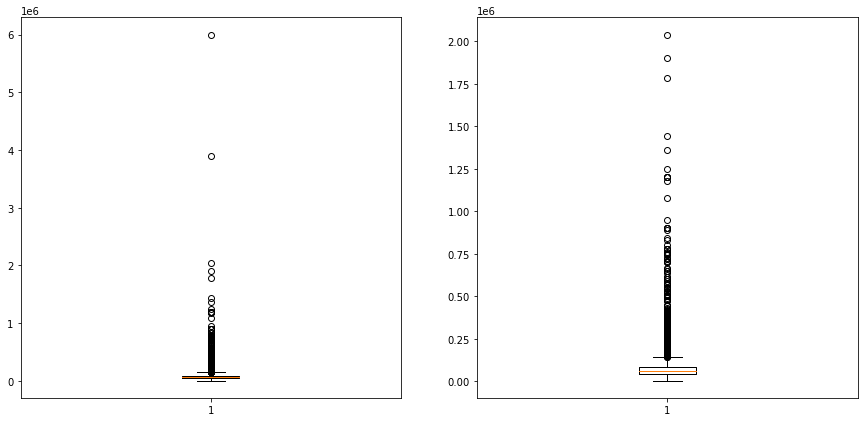

In [54]:
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
plt.boxplot(loan.annual_inc)
plt.subplot(1,2,2)
plt.boxplot(loan[loan['annual_inc'] < 3850000].annual_inc)

#### Observation: The 2 Outliers on the left chart doesnt affect the mean of the loan amount. Hence not removing those rows from the dataset.

In [55]:
loan.loan_status.value_counts()

Fully Paid     32916
Charged Off     5611
Name: loan_status, dtype: int64

In [56]:
#sns.countplot(loan.loan_status)

#### Observation: “Fully Paid” Category has borrowers in grade A & B predominantly. 
#### Whereas “Charged Off” Category borrowers shift towards grade B & C
#### Hence Grade A customers are relatively profitable customers

<AxesSubplot:title={'center':'Charged-Off borrowers against Grade'}, xlabel='grade', ylabel='count'>

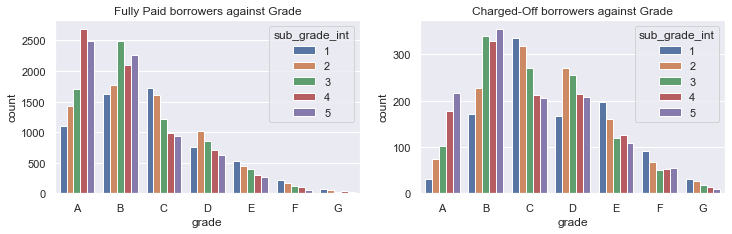

In [133]:
fig,ax = plt.subplots(figsize = (12,7))
plt.subplot(221)
plt.title('Fully Paid borrowers against Grade')
sns.countplot(x='grade', order=(['A','B','C','D','E','F','G']),data=loan[loan['loan_status']=='Fully Paid'], hue='sub_grade_int')
plt.subplot(222)
plt.title('Charged-Off borrowers against Grade')
sns.countplot(x='grade', order=(['A','B','C','D','E','F','G']), data=loan[loan.loan_status=='Charged Off'], hue='sub_grade_int')

#### Observation: Home Ownership Ratio between Fully Paid and Charged Off remain the same

<AxesSubplot:xlabel='home_ownership', ylabel='count'>

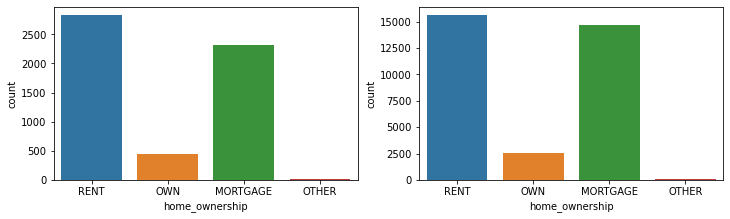

In [58]:
fig,ax = plt.subplots(figsize = (12,7))
plt.subplot(221)
sns.countplot(x='home_ownership', data=loan[loan.loan_status=='Charged Off'])
plt.subplot(222)
sns.countplot(x='home_ownership', data=loan[loan.loan_status=='Fully Paid'])

In [59]:
loan.home_ownership.value_counts()

RENT        18448
MORTGAGE    17010
OWN          2970
OTHER          99
Name: home_ownership, dtype: int64

#### Observation: Debt Consolidation & Credit Card are 3/4th the loan amount

In [60]:
loan[loan['purpose'].isin(['other','debt_consolidation','credit_card'])].funded_amnt_inv.sum()

292027821

In [61]:
loan[~loan['purpose'].isin(['other','debt_consolidation','credit_card'])].funded_amnt_inv.sum()

102136187

#### Use Log when one category skews the graph

<AxesSubplot:xlabel='count', ylabel='purpose'>

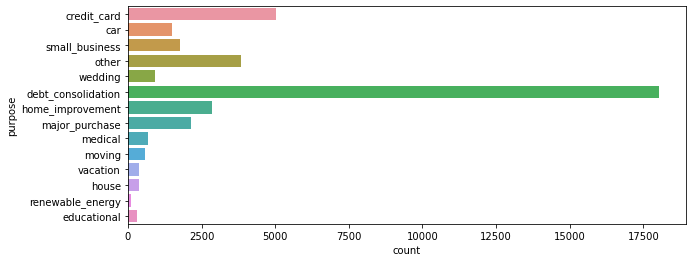

In [62]:
fig,ax = plt.subplots(figsize = (10,4))

#ax.set(xscale = 'log')

sns.countplot(y='purpose', data=loan) #, hue='loan_status'

#### Observation: Number of loans originated is almost 50% for debt consolidation 

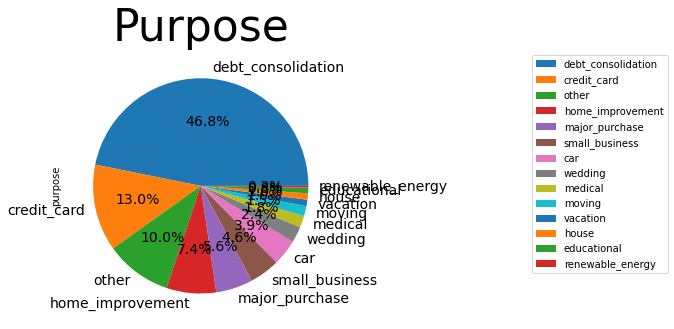

In [63]:
plt.figure(figsize=(5,3))

ax = loan['purpose'].value_counts().plot(kind='pie',radius=.99, textprops={'fontsize': 14} ,
                                         autopct='%1.1f%%', figsize=(5,5))
ax.legend(bbox_to_anchor=(1.7, 1), loc='upper left')
plt.title("Purpose",fontsize=44)
plt.show()


#### Observation: Debt 2 Income Spread is same across Fully Paid & Charged Off

<AxesSubplot:xlabel='dti_bin', ylabel='count'>

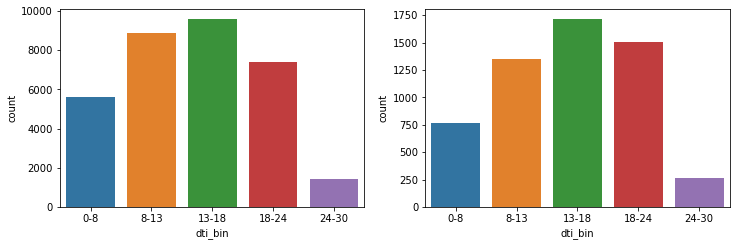

In [64]:
fig,ax = plt.subplots(figsize = (12,8))
plt.subplot(221)
sns.countplot(x='dti_bin', data=loan[loan.loan_status=='Fully Paid'])

plt.subplot(222)
sns.countplot(x='dti_bin', data=loan[loan.loan_status=='Charged Off'])

In [65]:
loan[(loan['purpose']=='home_improvement') & (loan['loan_status']=='Fully Paid')].annual_inc.mean()

91223.31433095803

In [66]:
loan[(loan['purpose']=='home_improvement') & (loan['loan_status']=='Charged Off')].annual_inc.mean()

77540.25

### Recommendation: Renewable Energy loans for borrowers with <60K USD is risky

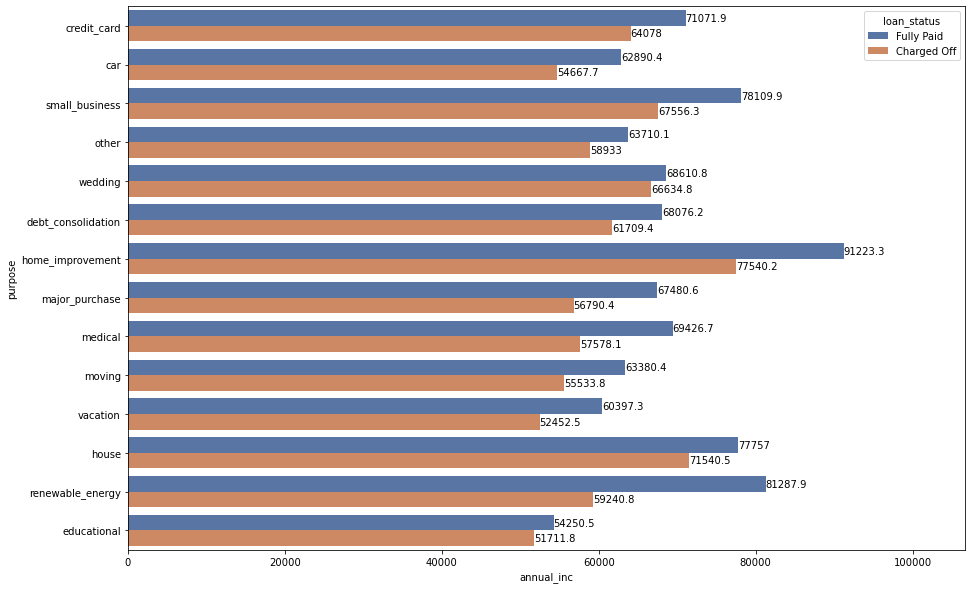

In [67]:
plt.figure(figsize=(15,10))
ax = sns.barplot(data =loan,x='annual_inc', y='purpose',palette="deep",errwidth=0, hue ='loan_status')
for i in ax.containers:
    ax.bar_label(i,)

In [68]:
loan[(loan['annual_inc'] > 60000) & (loan['purpose']=='debt_consolidation')].describe()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies,grade_int,sub_grade_int,IssuedYear,IssuedMonth
count,8141.000000,8141.000000,8141.000000,8141.000000,8141.000000,8141.000000,8.141000e+03,8141.000000,8141.000000,8141.000000,...,8141.000000,8141.000000,8141.000000,8141.000000,8141.000000,8045.000000,8141.000000,8141.000000,8141.000000,8141.000000
mean,15716.785407,14605.124063,43.523400,12.761162,453.682715,5.664538,9.764122e+04,13.723021,0.149122,0.866601,...,3289.437015,1.482816,152.268331,17.033946,4293.158770,0.042759,2.851370,3.087459,2010.414445,7.265692
std,8002.866070,7852.047964,11.134419,3.913329,229.141575,3.594817,6.360821e+04,6.108537,0.469587,1.054598,...,3165.539793,8.407456,1002.057442,160.116662,5873.358038,0.203552,1.502012,1.408370,0.807494,3.417729
min,1000.000000,0.000000,36.000000,5.420000,25.280000,0.000000,6.000800e+04,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2007.000000,1.000000
25%,10000.000000,8800.000000,36.000000,10.000000,283.200000,3.000000,7.000000e+04,9.150000,0.000000,0.000000,...,1148.140000,0.000000,0.000000,0.000000,377.330000,0.000000,2.000000,2.000000,2010.000000,5.000000
50%,15000.000000,13600.000000,36.000000,12.680000,407.780000,5.000000,8.340000e+04,13.730000,0.000000,1.000000,...,2268.470000,0.000000,0.000000,0.000000,1096.510000,0.000000,3.000000,3.000000,2011.000000,8.000000
75%,20000.000000,19900.000000,60.000000,15.580000,597.780000,10.000000,1.050000e+05,18.360000,0.000000,1.000000,...,4350.650000,0.000000,0.000000,0.000000,6417.790000,0.000000,4.000000,4.000000,2011.000000,10.000000
max,35000.000000,35000.000000,60.000000,24.110000,1305.190000,10.000000,2.039784e+06,29.920000,6.000000,8.000000,...,23563.680000,180.200000,29623.350000,5602.720000,35479.890000,2.000000,7.000000,5.000000,2011.000000,12.000000


In [69]:
#sns.pairplot(loan)

{'whiskers': [<matplotlib.lines.Line2D at 0x1d847fe7e50>,
 'caps': [<matplotlib.lines.Line2D at 0x1d847ff5430>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d847fe7b80>],
 'medians': [<matplotlib.lines.Line2D at 0x1d847ff59d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d847ff5ca0>],
 'means': []}

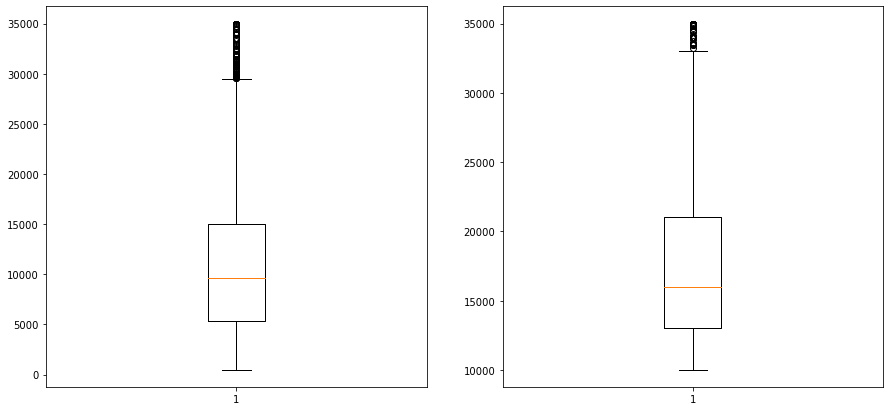

In [70]:
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
plt.boxplot(loan.loan_amnt)
plt.subplot(1,2,2)
plt.boxplot(loan[loan['loan_amnt'] > 10000].loan_amnt)

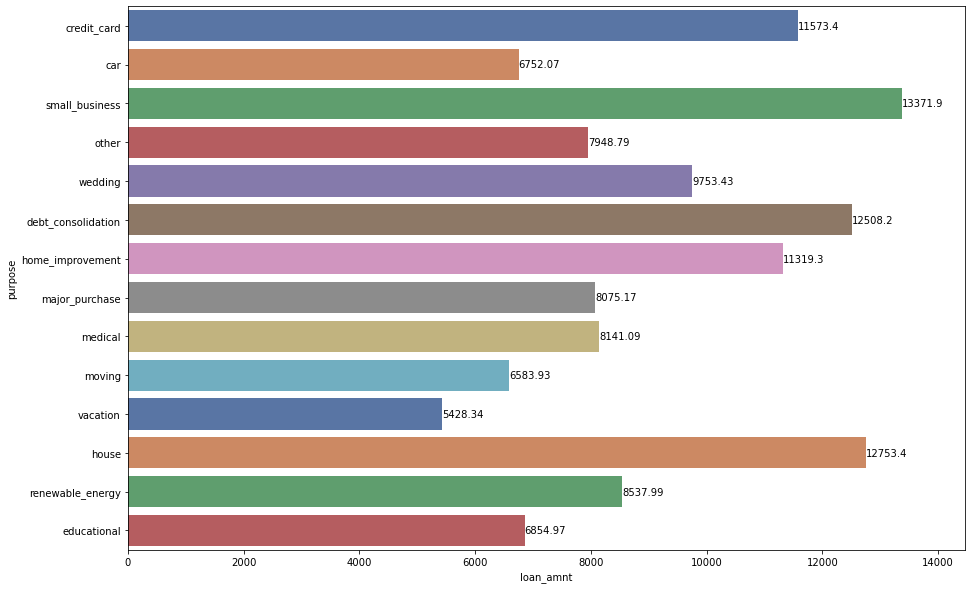

In [71]:
plt.figure(figsize=(15,10))
ax = sns.barplot(data =loan,x='loan_amnt', y='purpose',palette="deep",errwidth=0) # hue ='loan_status',
for i in ax.containers:
    ax.bar_label(i,)

### Bivariate analysis adds another dimension to the 'Purpose' univariate analysis by telling that Borrowers from high income group spend more on Home Improvements

<AxesSubplot:title={'center':'Funded Amount by Investor against Loan Term'}, xlabel='term', ylabel='funded_amnt_inv'>

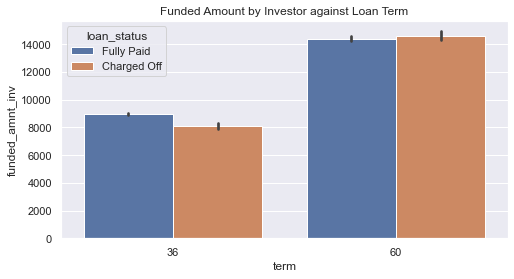

In [137]:
plt.figure(figsize=(8,4))
plt.title('Funded Amount by Investor against Loan Term')
sns.barplot(data =loan,x='term', y='funded_amnt_inv', palette="deep", hue ='loan_status')

#sns.barplot(loan['annual_inc'],loan['purpose'], hue ='loan_status',palette="deep")

### Longer the term, higher the loan amount taken

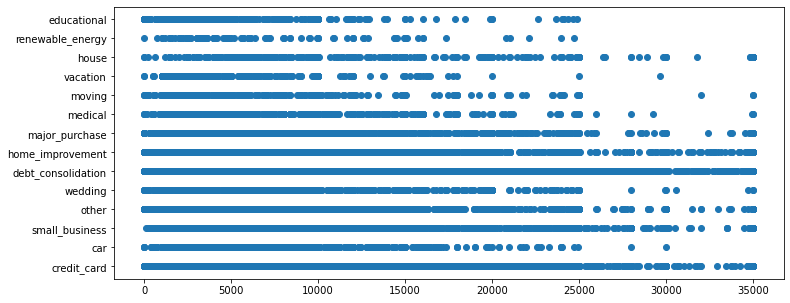

In [73]:
plt.figure(figsize=(12,5))
plt.scatter(loan['funded_amnt_inv'] ,loan['purpose'])
plt.show()

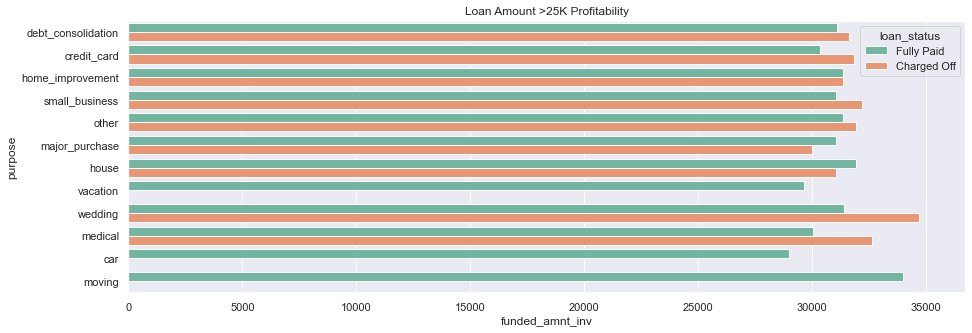

In [135]:
plt.figure(figsize=(15,5))
plt.title('Loan Amount >25K Profitability')
sns.barplot(data =loan[loan['funded_amnt_inv']> 25000],y='purpose', x='funded_amnt_inv', palette="Set2", 
            errwidth=0, hue ='loan_status')
plt.show()

### Higher loan amounts are predominantly taken for Debt Consolidation, Home Improvement & Credit Card
### Wedding and Medical loans have higher default rate
### Vacation/Car/Moving have no defaulters

<AxesSubplot:title={'center':'Delinquent in last 2 years against Funded Amount Category'}, xlabel='delinq_2yrs', ylabel='funded_amnt_inv_bin'>

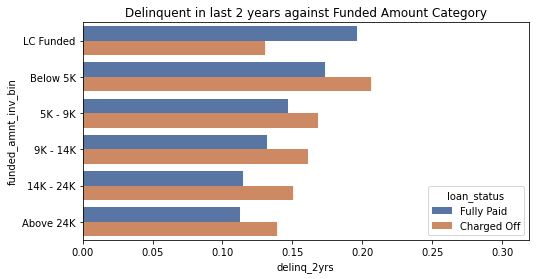

In [75]:
plt.figure(figsize=(8,4))
plt.title('Delinquent in last 2 years against Funded Amount Category')
sns.barplot(data =loan,x='delinq_2yrs', y='funded_amnt_inv_bin', hue ='loan_status', palette="deep", errwidth=0)

#sns.barplot(loan['annual_inc'],loan['purpose'], hue ='loan_status',palette="deep")

<AxesSubplot:title={'center':'Delinquent in last 2 years against Funded Amount Category'}, xlabel='delinq_2yrs', ylabel='funded_amnt_inv_bin'>

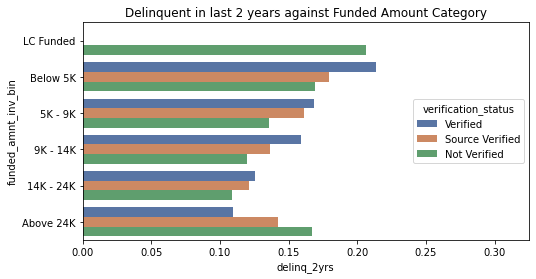

In [76]:
plt.figure(figsize=(8,4))
plt.title('Delinquent in last 2 years against Funded Amount Category')
sns.barplot(data =loan,x='delinq_2yrs', y='funded_amnt_inv_bin', hue ='verification_status', palette="deep", errwidth=0)

#sns.barplot(loan['annual_inc'],loan['purpose'], hue ='loan_status',palette="deep")

<AxesSubplot:title={'center':'Delinquent in last 2 years against US-State'}, xlabel='delinq_2yrs', ylabel='addr_state'>

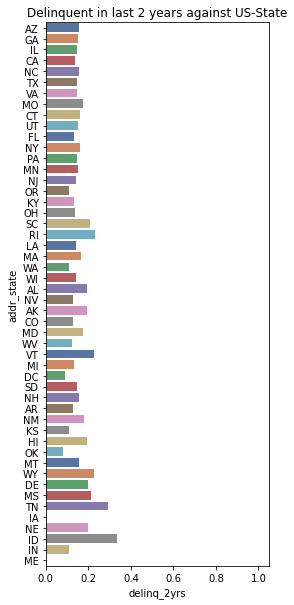

In [77]:
plt.figure(figsize=(4,10))
plt.title('Delinquent in last 2 years against US-State')
sns.barplot(data =loan,x='delinq_2yrs', y='addr_state',  palette="deep", errwidth=0)# hue ='verification_status',

#sns.barplot(loan['annual_inc'],loan['purpose'], hue ='loan_status',palette="deep")

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

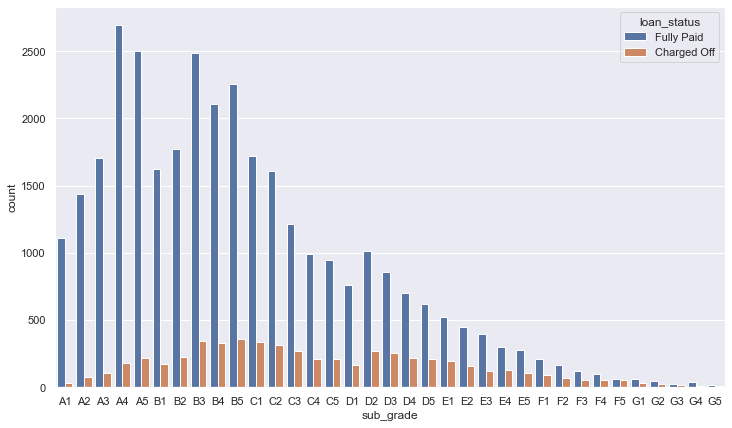

In [79]:
#fig,ax = plt.subplots(figsize = (12,8))

fig,ax = plt.subplots(figsize = (12,7))
#ax.set(xscale = 'log')

sns.countplot(x=loan.sub_grade, hue = loan.loan_status, order=(['A1', 'A2','A3', 'A4','A5','B1','B2', 'B3', 'B4', 'B5', 
'C1', 'C2','C3','C4', 'C5', 'D1', 'D2', 'D3','D4','D5', 'E1','E2','E3', 'E4', 'E5', 
'F1', 'F2','F3', 'F4','F5', 'G1','G2','G3', 'G4', 'G5'])) #palette = 'Set2', hue_order =

In [80]:
loan.sub_grade.unique()

array(['B2', 'C4', 'C5', 'C1', 'A4', 'E1', 'F2', 'B5', 'C3', 'B1', 'D1',
       'A1', 'B3', 'B4', 'C2', 'D2', 'A3', 'A5', 'D5', 'A2', 'E4', 'D3',
       'D4', 'F3', 'E3', 'F1', 'E5', 'G4', 'E2', 'G2', 'G1', 'F5', 'F4',
       'G5', 'G3'], dtype=object)

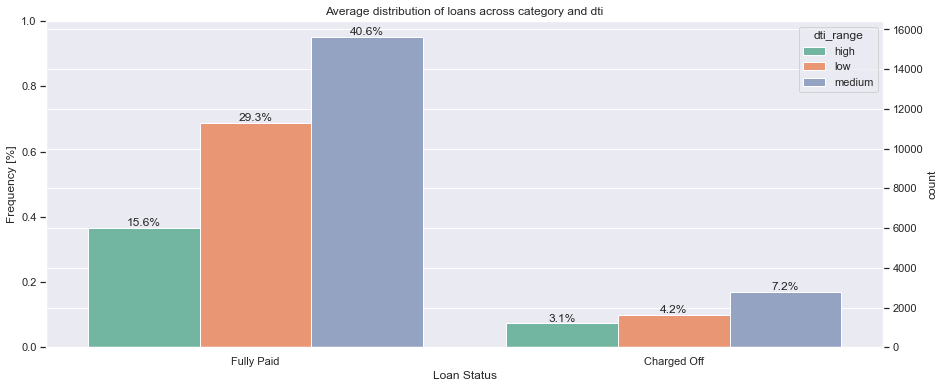

In [81]:
def dti_range_calculator(dti):
    if dti <= 10.00:
        return 'low'
    elif (dti >10.00 and dti <= 20.00):
        return 'medium'
    else:
        return 'high'

loan['dti_range'] = loan['dti'].apply(lambda x : dti_range_calculator(x))
plt_freq("loan_status",loan,'Loan Status','Average distribution of loans across category and dti','dti_range')

In [82]:
loan['yr_install'] = loan.installment * 12 
loan['iti'] = round(loan.yr_install/loan.annual_inc,4)
loan.filter([ 'installment', 'yr_install', 'annual_inc' , 'dti','iti' ]).head()

,installment,yr_install,annual_inc,dti,iti
0,162.87,1954.44,24000,27.65,0.0814
1,59.83,717.96,30000,1.00,0.0239
2,84.33,1011.96,12252,8.72,0.0826
3,339.31,4071.72,49200,20.00,0.0828
5,156.46,1877.52,36000,11.20,0.0522


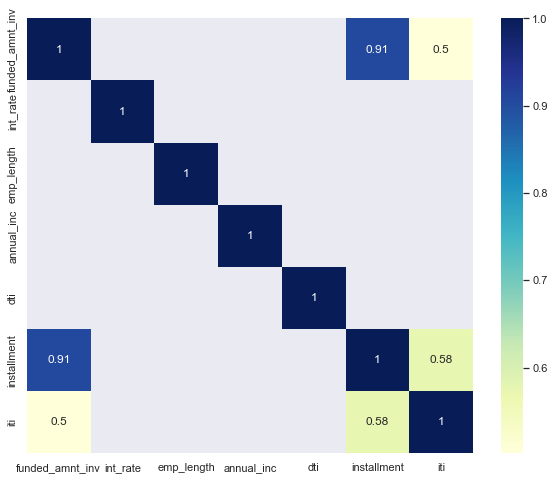

In [83]:
# Filtering all the numerical values to understand their correlation
loan_data_corr = loan.filter(["funded_amnt_inv","int_rate","emp_length","annual_inc","dti","installment","iti"]) 
cor = loan_data_corr.corr()
round(cor, 3)
#Plotting Heat map to understand correlation visually
plt.figure(figsize=(10,8))

# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True, mask = (np.abs(cor) <= 0.5))
plt.show()

In [84]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38527 entries, 0 to 39716
Data columns (total 50 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   loan_amnt                38527 non-null  int64   
 1   funded_amnt_inv          38527 non-null  int64   
 2   term                     38527 non-null  int32   
 3   int_rate                 38527 non-null  float64 
 4   installment              38527 non-null  float64 
 5   grade                    38527 non-null  object  
 6   sub_grade                38527 non-null  object  
 7   emp_length               38527 non-null  int64   
 8   home_ownership           38527 non-null  object  
 9   annual_inc               38527 non-null  int64   
 10  verification_status      38527 non-null  object  
 11  issue_d                  38527 non-null  object  
 12  loan_status              38527 non-null  object  
 13  purpose                  38527 non-null  object  
 14  addr_s

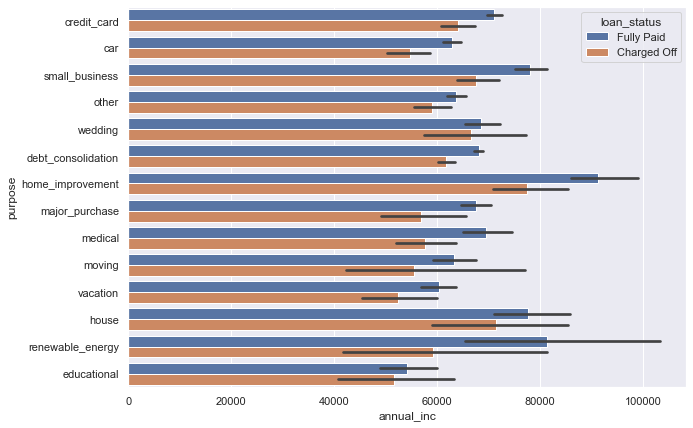

In [85]:
#1. Annual income vs purpose

plt.figure(figsize=(10,7))
sns.barplot(data =loan,x='annual_inc', y='purpose', hue ='loan_status',palette="deep")
plt.show()




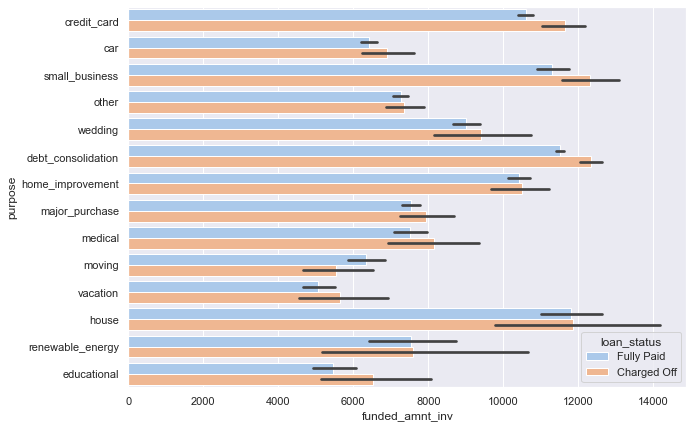

In [86]:

#6. Loan vs Loan purpose
plt.figure(figsize=(10,7))
sns.barplot(data =loan,x='funded_amnt_inv', y='purpose', hue ='loan_status',palette="pastel")
plt.show()



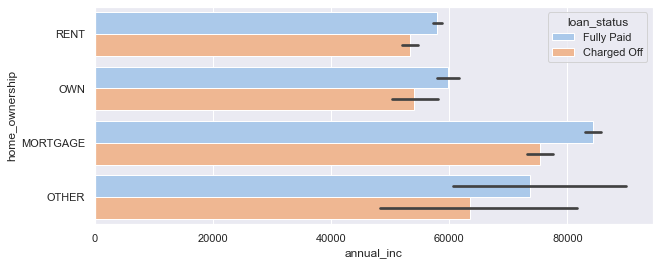

In [87]:
#2.Annual income vs home ownership
plt.figure(figsize=(10,4))
sns.barplot(data =loan,x='annual_inc', y='home_ownership', hue ='loan_status',palette="pastel")
plt.show()



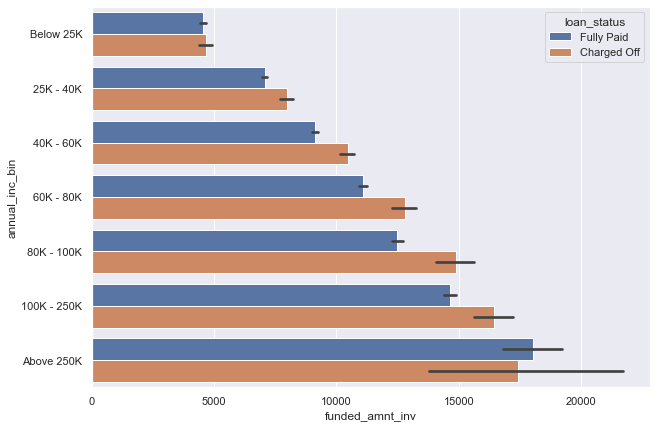

In [88]:
#3. Annual Income vs Loan amount
plt.figure(figsize=(10,7))
sns.barplot(x = "funded_amnt_inv", y = "annual_inc_bin", hue = 'loan_status', data = loan)
plt.show()



#### More the income, more the loan availed

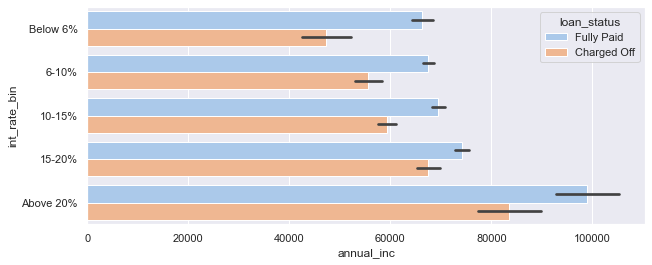

In [89]:
#4. Annual income vs int_rate
plt.figure(figsize=(10,4))
sns.barplot(data =loan,x='annual_inc', y='int_rate_bin', hue ='loan_status',palette="pastel")
plt.show()



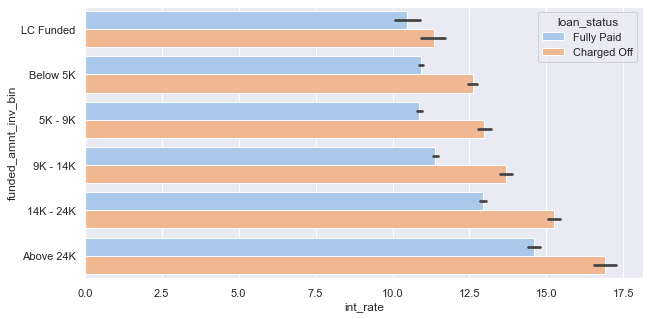

In [90]:
#5. Loan Amount vs Avg Interest Rate
plt.figure(figsize=(10,5))
sns.barplot(data =loan,x='int_rate', y='funded_amnt_inv_bin', hue ='loan_status',palette="pastel")
plt.show()


In [91]:
loan[(loan['funded_amnt_inv_bin']=='LC Funded')].int_rate.mean()


10.748513513513513

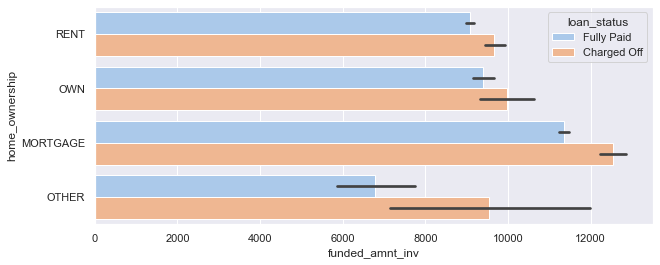

In [92]:
#7. Loan vs House Ownership
plt.figure(figsize=(10,4))
sns.barplot(data =loan,x='funded_amnt_inv', y='home_ownership', hue ='loan_status',palette="pastel")
plt.show()

<AxesSubplot:xlabel='IssuedYear', ylabel='funded_amnt_inv'>

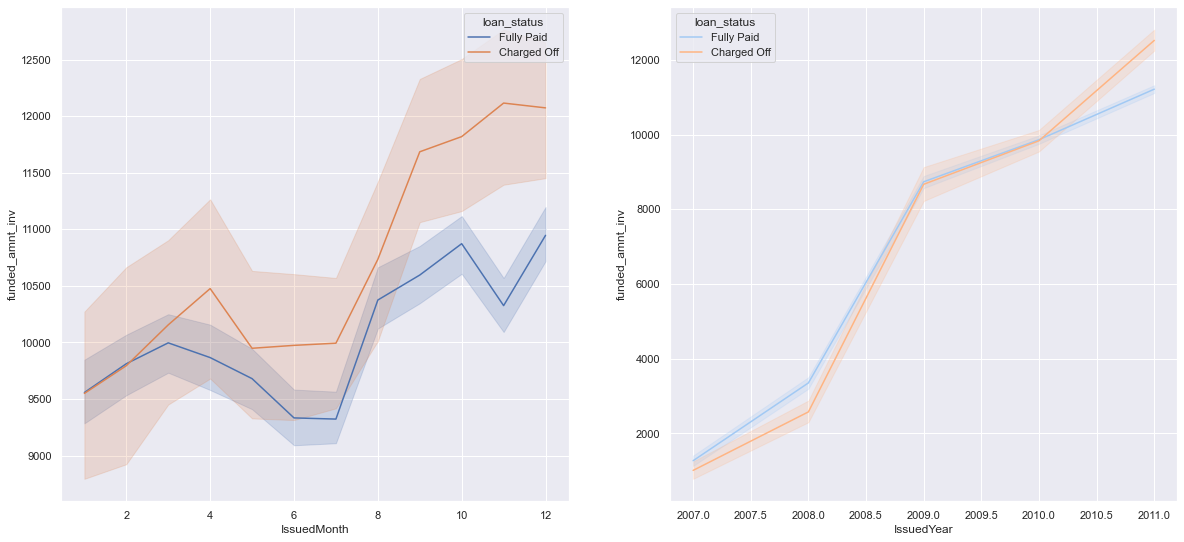

In [93]:
#8a. Loan amount vs month issued and year issued
plt.figure(figsize=(20,20))
plt.subplot(221)
sns.lineplot(data =loan,y='funded_amnt_inv', x='IssuedMonth', hue ='loan_status',palette="deep")
plt.subplot(222)
sns.lineplot(data =loan,y='funded_amnt_inv', x='IssuedYear', hue ='loan_status',palette="pastel")


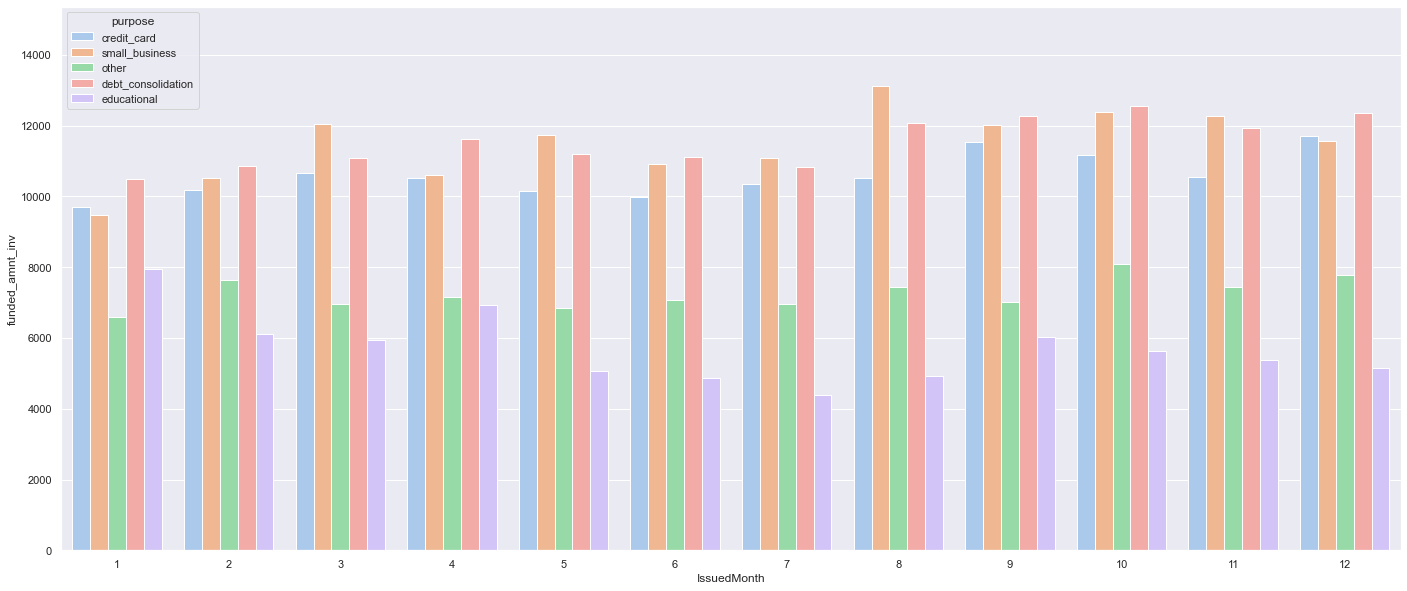

In [94]:
#8b. Loan amount vs month issued with 'Purpose' Variation

plt.figure(figsize=(24,10))
sns.barplot(data =loan[loan['purpose'].isin(['debt_consolidation','credit_card','small_business','other','educational'])] ,
            y='funded_amnt_inv', x='IssuedMonth', hue ='purpose',palette="pastel", errwidth=0)
plt.show()


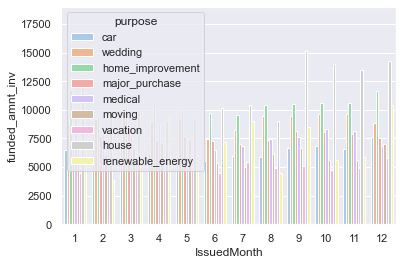

In [95]:
sns.barplot(data =loan[~loan['purpose'].isin(['debt_consolidation','credit_card','small_business','other','educational'])] ,
            y='funded_amnt_inv', x='IssuedMonth', hue ='purpose',palette="pastel", errwidth=0)
plt.show()


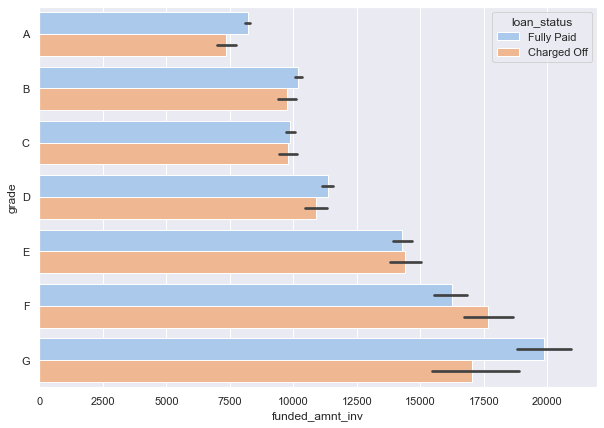

In [96]:
#9. Loan amount vs Grade
plt.figure(figsize=(10,7))
sns.barplot(data =loan,x='funded_amnt_inv', y='grade', hue ='loan_status',palette="pastel", order=['A','B','C','D','E','F','G'])
plt.show()



### Grade E F G been santioned the highest loan amount

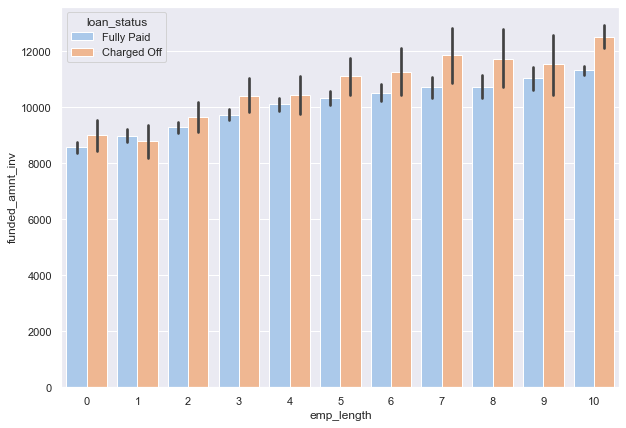

In [97]:
#10. Loan amt vs emp_length
plt.figure(figsize=(10,7))
sns.barplot(data =loan,x='emp_length', y='funded_amnt_inv', hue ='loan_status',palette="pastel",orient = 'v')
plt.show()

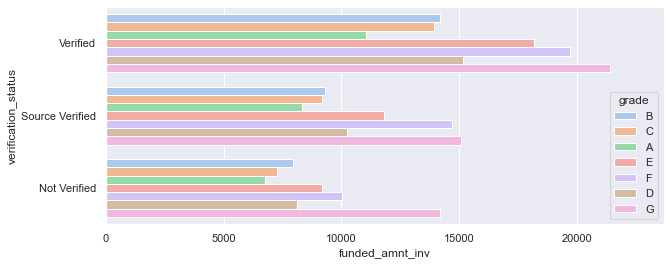

In [98]:
#11.  Loan_amt vs Source Verified
plt.figure(figsize=(10,4))
sns.barplot(data =loan,x='funded_amnt_inv', y='verification_status', hue ='grade',palette="pastel", errwidth=0)
plt.show()

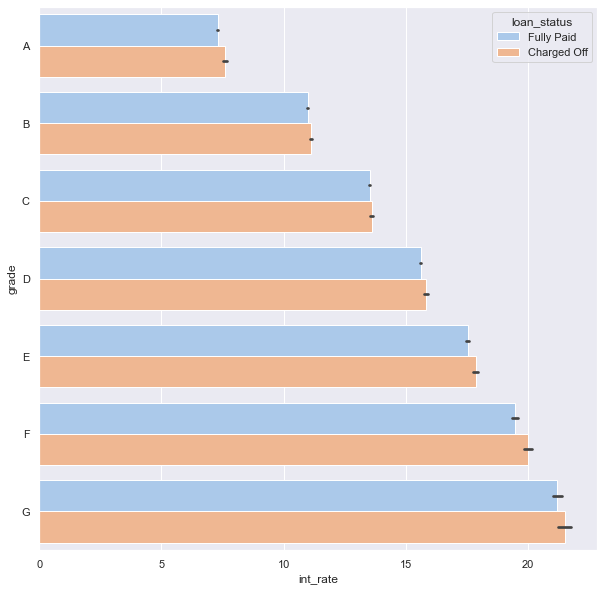

In [99]:
#12. Grade vs interest rate
plt.figure(figsize=(10,10))
sns.barplot(data =loan,x='int_rate', y='grade', hue ='loan_status',palette="pastel", order=['A','B','C','D','E','F','G'])
plt.show()

<Figure size 720x288 with 0 Axes>

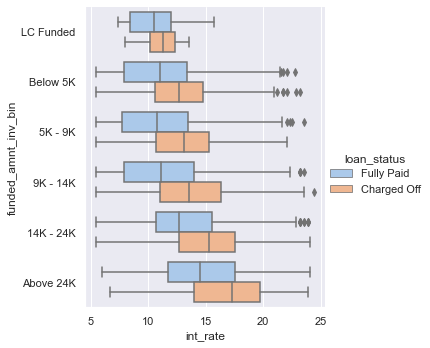

In [100]:
#13. Loan Amnt Groups vs Int_rate
#loan['funded_amnt_inv_bin'] = pd.cut(loan['funded_amnt_inv'], bins=7,precision =0,labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k'])
#plt.tight_layout()
plt.figure(figsize=(10,4))
sns.catplot(data =loan,x ='int_rate', y ='funded_amnt_inv_bin', hue ='loan_status',palette="pastel",kind = 'box')
plt.show()

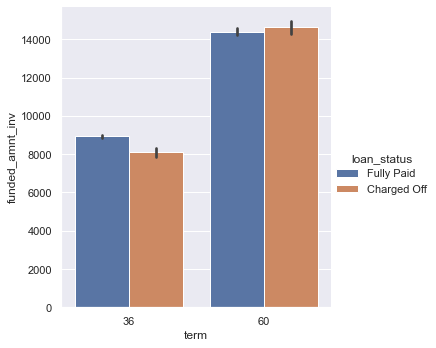

In [101]:
#14. Loan amnt vs Term
sns.catplot(x = 'term', y = 'funded_amnt_inv', data = loan,hue = 'loan_status', kind = 'bar')
plt.show()

In [102]:
q0, q25,q50, q75 ,q95, q100= np.percentile(loan['funded_amnt_inv'], [0,25, 50, 75,95, 100])
print(q0)
print(q25)
print(q50)
print(q75)
print(q95)
print(q100)

0.0
5000.0
8750.0
14000.0
24506.0
35000.0


In [103]:
loan[loan['funded_amnt_inv']==0].describe()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies,grade_int,sub_grade_int,IssuedYear,IssuedMonth,issue_year,yr_install,iti
count,148.000000,148.0,148.0,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,...,148.000000,148.000000,147.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000
mean,6431.587838,0.0,36.0,10.748514,183.670338,3.662162,58348.006757,11.713311,0.175676,1.202703,...,47.653147,1583.571757,0.054422,2.452703,2.979730,2007.993243,6.743243,2007.993243,2204.044054,0.046795
std,3135.336458,0.0,0.0,1.871297,82.448115,3.546684,46963.691997,6.921763,0.530899,1.350029,...,273.552379,1879.997662,0.227624,1.051946,1.397128,0.082199,1.534730,0.082199,989.377376,0.027738
min,1000.000000,0.0,36.0,7.370000,32.010000,0.000000,12120.000000,0.000000,0.000000,0.000000,...,0.000000,0.360000,0.000000,1.000000,1.000000,2007.000000,4.000000,2007.000000,384.120000,0.003900
25%,4800.000000,0.0,36.0,9.450000,133.275000,1.000000,36750.000000,6.045000,0.000000,0.000000,...,0.000000,167.430000,0.000000,2.000000,2.000000,2008.000000,6.000000,2008.000000,1599.300000,0.026275
50%,7000.000000,0.0,36.0,11.030000,189.205000,2.000000,50000.000000,11.120000,0.000000,1.000000,...,0.000000,401.590000,0.000000,3.000000,3.000000,2008.000000,7.000000,2008.000000,2270.460000,0.039300
75%,7500.000000,0.0,36.0,12.220000,240.350000,7.000000,62675.000000,18.027500,0.000000,2.000000,...,0.000000,2793.087500,0.000000,3.000000,4.000000,2008.000000,8.000000,2008.000000,2884.200000,0.059550
max,25000.000000,0.0,36.0,15.700000,504.400000,10.000000,500000.000000,24.910000,3.000000,8.000000,...,2598.941800,7199.140000,1.000000,5.000000,5.000000,2008.000000,10.000000,2008.000000,6052.800000,0.131200


In [104]:
loan.groupby(['funded_amnt_inv_bin']).sum()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies,grade_int,sub_grade_int,IssuedYear,IssuedMonth,issue_year,yr_install,iti
funded_amnt_inv_bin,,,,,,,,,,,,,,,,,,,,,
LC Funded,951875,0,5328,1590.78,27183.21,542,8635505,1733.57,26,178,...,7052.6658,234368.62,8.0,363,441,297183,998,297183,326198.52,6.9257
Below 5K,45481350,34700856,403752,117422.43,1417777.99,47932,568327886,131778.34,1875,9382,...,69694.2021,9366177.25,520.0,24339,31445,21133579,72782,21133579,17013335.88,410.6017
5K - 9K,64421675,59219309,343596,96044.25,1968261.76,41570,524792697,113080.29,1288,7527,...,48706.7676,13928595.25,377.0,19637,26163,17322657,60200,17322657,23619141.12,495.9602
9K - 14K,113303050,106784279,409560,112944.92,3325459.21,49612,673163749,130467.06,1310,8167,...,107300.2948,26953524.51,434.0,23688,29720,19412632,68856,19412632,39905510.52,715.3695
14K - 24K,140384900,133034231,346320,99547.83,3959979.95,42524,628361972,105337.26,901,6344,...,163996.0067,36817722.98,269.0,22510,23269,15006302,54996,15006302,47519759.40,681.3206
Above 24K,61383350,60425333,105888,31975.87,1733178.23,13483,247731090,29101.52,250,1988,...,94597.0267,18618098.57,38.0,7751,6567,4278861,16310,4278861,20798138.76,218.1180


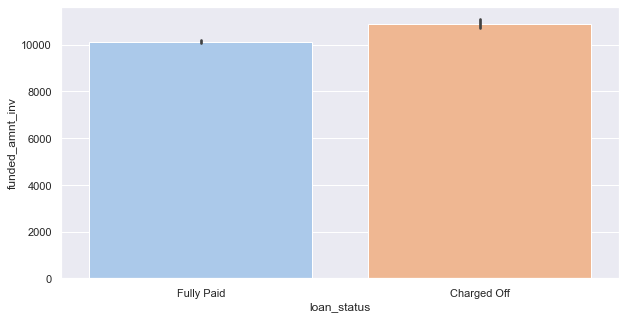

In [106]:
#5. Loan Amount vs Avg Interest Rate
plt.figure(figsize=(10,5))
sns.barplot(data =loan,x='loan_status', y='funded_amnt_inv',palette="pastel")
plt.show()